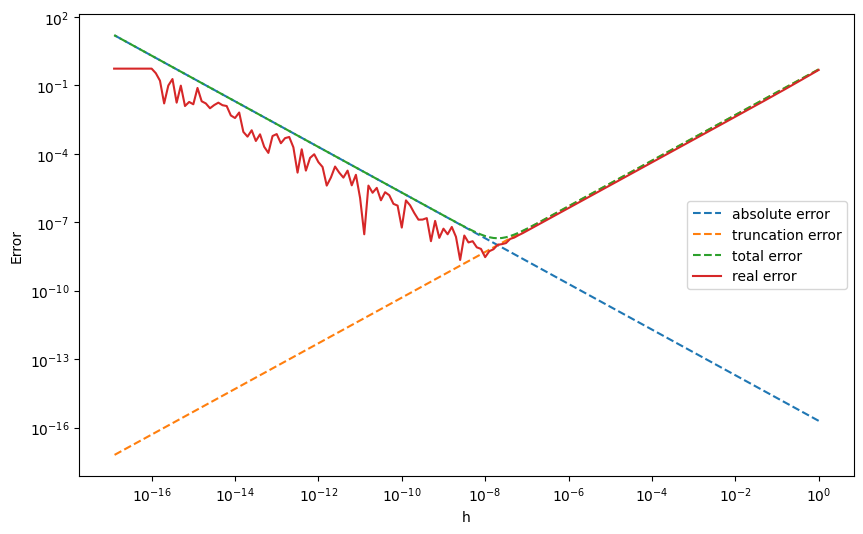

In [26]:
import math
import numpy as np
import matplotlib.ticker as ticker

def f(x):
    return math.sin(x)

M = 1
eps = 1e-16

def trunc_err(h):
    return M*h/2

def abs_err(h):
    return 2*eps/h

def tot_err(h):
    return trunc_err(h)+abs_err(h)


h_arr = 1/10**np.arange(0,17,1e-1,dtype=np.float64)

abs_err_arr = [abs_err(h) for h in h_arr]
trunc_err_arr = [trunc_err(h) for h in h_arr]
err_arr = [tot_err(h) for h in h_arr]
real_err_arr = [np.absolute((f(1+h)-f(1))/h-math.cos(1)) for h in h_arr]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) 
plt.plot(h_arr, abs_err_arr, label='absolute error',  linestyle='--')
plt.plot(h_arr, trunc_err_arr, label='truncation error',  linestyle='--')
plt.plot(h_arr, err_arr, label='total error',  linestyle='--')
plt.plot(h_arr, real_err_arr, label='real error')
plt.xscale('log')  # 设置 x 轴为对数坐标轴
plt.yscale('log')  # 设置 y 轴为对数坐标轴
plt.xlabel('h')
plt.ylabel('Error')
# plt.xticks([10**i for i in range(-16,1)], [f'10^{i}' for i in range(-16,1)])  # 设置 x 轴刻度
plt.gca().xaxis.set_major_locator(ticker.LogLocator(numticks=15))
plt.legend()
plt.show()






In [58]:
# 采用 IEEE 单精度浮点数, 观察当 为何值时, 求和结果不再变化, 将它与理论分析的结论进行比较

import numpy as np

a = 1
sum_value_single_float = np.float32(0)
while(True):
    new_sum_value = sum_value_single_float + np.float32(1/a)
    a += 1
    if(sum_value_single_float == new_sum_value):
        print(a)
        break
    sum_value_single_float = new_sum_value
    # print(sum_value)
print(sum_value_single_float)


2097153
15.403683


In [59]:

import numpy as np
C = 0.57721566490153286060651209 
n = 1
while(True):
    if (n+1)*(math.log(1+n)+C) > 2**25:
        print(n)
        break
    n+=1

2209628


In [60]:
import numpy as np

a = 1
sum_value_double_float = np.float64(0)
while(a <= 2097153):
    new_sum_value = sum_value_double_float + np.float64(1/a)
    a += 1
    sum_value_double_float = new_sum_value
    # print(sum_value)
print(sum_value_double_float-sum_value_single_float)

-0.2703755368251102


In [61]:
# 采用 IEEE 单精度浮点数, 观察当 为何值时, 求和结果不再变化, 将它与理论分析的结论进行比较

import numpy as np
import time
a = 1
sum_value_single_float = np.float64(0)
start = time.time()
while(a<1e7):
    new_sum_value = sum_value_single_float + np.float64(1/a)
    a += 1
    if(sum_value_single_float == new_sum_value):
        print(a)
        break
    sum_value_single_float = new_sum_value
    # print(sum_value)
end = time.time()
print(f"user time: {end-start:.2f} s")

user time: 3.96 s


In [62]:
import numpy as np
C = 0.57721566490153286060651209 
n = 1
while(True):
    if (n+1)*(math.log(1+n)+C) > 2**54:
        print(n)
        break
    n+=1e7

522654040000001.0


In [63]:
print(f"{(n/1e7*(end-start)/3600/24/365):.2f} years")

6.56 years
